#Assignment 1: Improve Accuracy on CIFAR-10

---
**DATASET:** UCI FOREST COVERTYPE

**Classes:** 10 object categories (airplane, automobile, bird, etc.)

---

* Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers,models,callbacks
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report,confusion_matrix



* Load and Normalize the Data

---

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (50000, 32, 32, 3) (50000, 1)
Test: (10000, 32, 32, 3) (10000, 1)


In [4]:
X_train,X_test=X_train/255.0,X_test/255.0

* Split train set into train + validation

---

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=42)

* Image Augmentation

---

*Image augmentation is  used to artificially increase the diversity of our training dataset by applying random transformations to the input images during training.*

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.05,
                           height_shift_range=0.05,
                           horizontal_flip=True)
datagen.fit(X_train)

**Baseline CNN Model**
--
##Structure Detail:

* The structure starts with two convolutional layers that help the model detect important features such as edges, textures, and shapes from the input images. These are followed by max pooling layers that reduce the spatial dimensions of the data.

* After the feature extraction layers, the model flattens the output into a one-dimensional vector and passes it through a fully connected (dense) layer, which helps in learning higher-level  features. Finally, the output layer uses a softmax activation function to classify the input image into one of the 10 CIFAR-10 categories.

In [7]:
from tensorflow.keras.optimizers import Adam

baseline_model=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                                  layers.MaxPooling2D((2,2)),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.Flatten(),
                                  layers.Dense(64, activation='relu'),
                                  layers.Dense(10, activation='softmax')
                                  ])
baseline_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

baseline_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       692,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,330 (2.72 MB)

 Trainable params: 712,330 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_baseline = baseline_model.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.4063 - loss: 1.6460 - val_accuracy: 0.5930 - val_loss: 1.1532
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.6246 - loss: 1.0729 - val_accuracy: 0.6414 - val_loss: 1.0231
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.6831 - loss: 0.9016 - val_accuracy: 0.6564 - val_loss: 0.9732
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.7277 - loss: 0.7858 - val_accuracy: 0.6866 - val_loss: 0.9029
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.7599 - loss: 0.6868 - val_accuracy: 0.6938 - val_loss: 0.9208
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7920 - loss: 0.5950 - val_accuracy: 0.6950 - val_loss: 0.9272
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8261 - loss: 0.5029 - val_accuracy: 0.6830 - val_loss: 0.9664
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.8513 -

* Evaluate

---

In [9]:
loss_bl,acc_bl=baseline_model.evaluate(X_test,y_test)
print(f'Test Loss: {loss_bl:.4f}')
print(f'Test Accuracy: {100*acc_bl:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6551 - loss: 2.4813
Test Loss: 2.4724
Test Accuracy: 65.02%


* Base Structure to plot 'Accuracy' and 'Loss' curves.

---

In [10]:
def plot_learning_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(11,5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r--', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

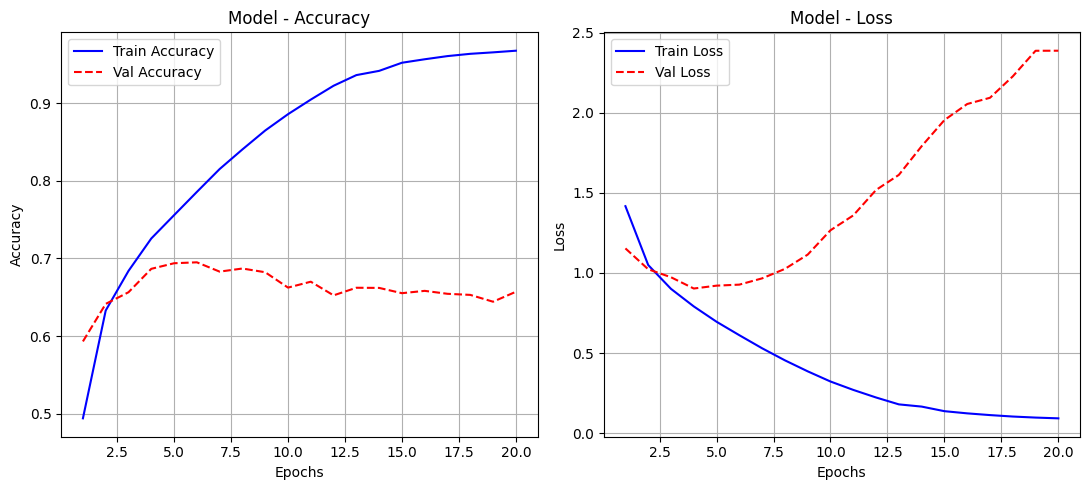

In [11]:
plot_learning_curves(history_baseline)

* *Validation accuracy, though, hovers around 0.7 and doesn't improve much over epochs. That's a red flag for overfitting.*

* *Validation loss, however, bottoms out briefly, then climbs steadily past 2.0. Classic overfitting curve.*

---

**Batch Normalization**
---

In [12]:
model_bn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
model_bn.compile(optimizer=Adam(0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_bn = model_bn.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.4376 - loss: 1.8372 - val_accuracy: 0.5538 - val_loss: 1.3061
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6860 - loss: 0.9066 - val_accuracy: 0.5598 - val_loss: 1.3632
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7678 - loss: 0.6699 - val_accuracy: 0.6354 - val_loss: 1.1176
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 38ms/step - accuracy: 0.8329 - loss: 0.4748 - val_accuracy: 0.5830 - val_loss: 1.3695
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.8843 - loss: 0.3347 - val_accuracy: 0.6450 - val_loss: 1.3000
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9207 - loss: 0.2304 - val_accuracy: 0.6104 - val_loss: 1.7703
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - accuracy: 0.9418 - loss: 0.1726 - val_accuracy: 0.5912 - val_loss: 2.0444
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9479 -

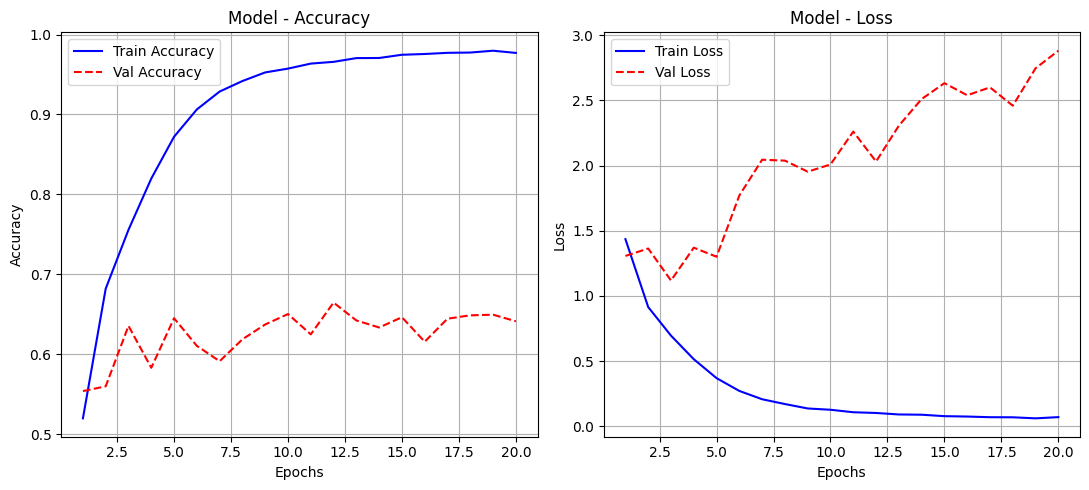

In [14]:
plot_learning_curves(history_bn)

* *Validation Accuracy lingers between 0.55 and 0.65.*

* *Val Loss increases from ~1.0 to over 2.5 ,indicating high variance and overfitting.*

---

**Dropout**
---

In [15]:
model_dropout = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_dropout.compile(optimizer=Adam(0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history_dp=model_dropout.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.2933 - loss: 1.9010 - val_accuracy: 0.5012 - val_loss: 1.4146
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.4483 - loss: 1.5144 - val_accuracy: 0.5668 - val_loss: 1.2162
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5056 - loss: 1.3579 - val_accuracy: 0.6064 - val_loss: 1.1267
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.5378 - loss: 1.2679 - val_accuracy: 0.6296 - val_loss: 1.0363
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.5600 - loss: 1.2020 - val_accuracy: 0.6414 - val_loss: 1.0197
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.5794 - loss: 1.1498 - val_accuracy: 0.6506 - val_loss: 0.9833
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.5995 - loss: 1.0901 - val_accuracy: 0.6494 - val_loss: 1.0080
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.6217 -

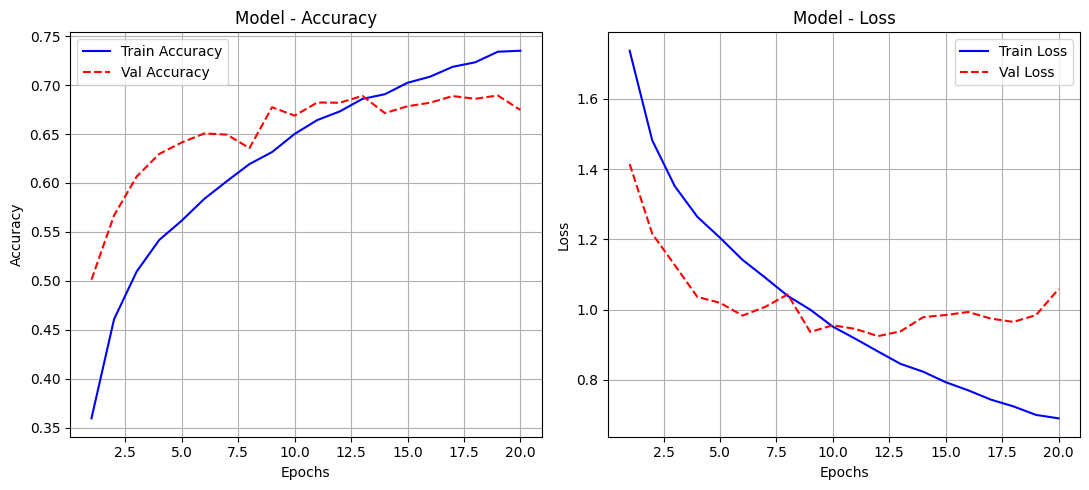

In [17]:
plot_learning_curves(history_dp)

* *Validation Accuracy rises initially to ~0.70 but begins to wobble after epoch 10.*

* *Validation Loss trends downward from 1.4 to 1.0, then plateaus with some minor bumps.*

---

**Increased Depth (more Conv layers)**
--

In [18]:
model_deep = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_deep.compile(optimizer=Adam(0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history_deep=model_deep.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.3496 - loss: 1.7553 - val_accuracy: 0.5722 - val_loss: 1.1833
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.5937 - loss: 1.1458 - val_accuracy: 0.6418 - val_loss: 1.0096
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.6685 - loss: 0.9435 - val_accuracy: 0.6444 - val_loss: 1.0248
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.7123 - loss: 0.8215 - val_accuracy: 0.7028 - val_loss: 0.8679
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.7457 - loss: 0.7312 - val_accuracy: 0.6952 - val_loss: 0.8996
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.7733 - loss: 0.6504 - val_accuracy: 0.7014 - val_loss: 0.8977
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.7982 - loss: 0.5746 - val_accuracy: 0.7110 - val_loss: 0.8798
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8197 -

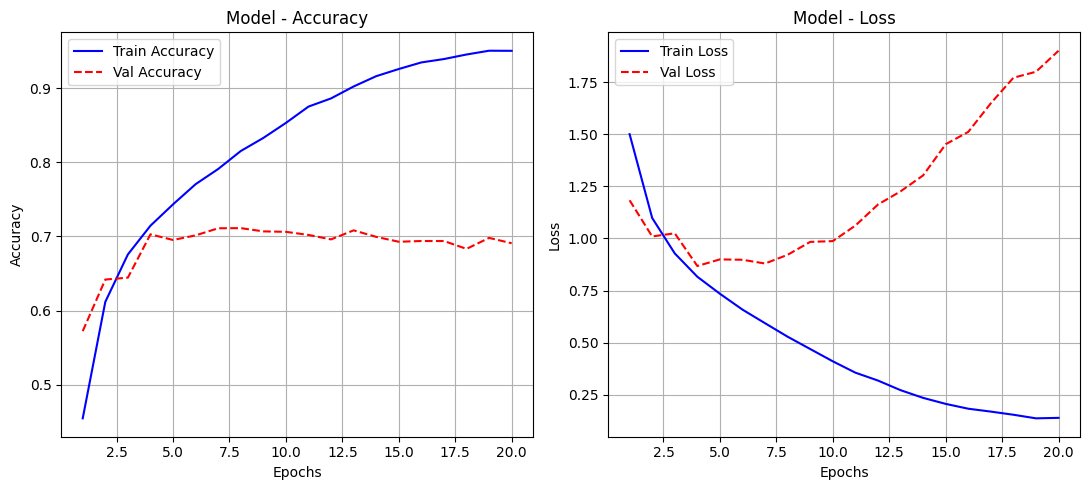

In [20]:
plot_learning_curves(history_deep)

* *Validation Accuracy climbs to ~0.7 but stays flat afterward.*

* *Validation Loss rises sharply beyond 1.75 — this spike suggests overfitting has returned.*

---

**Optimizer Tuning (SGD with Momentum)**
---

In [21]:
from tensorflow.keras.optimizers import SGD

model_sgd = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

sgd = SGD(learning_rate=0.01, momentum=0.9)

model_sgd.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history_sgd=model_sgd.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.3292 - loss: 1.8282 - val_accuracy: 0.5372 - val_loss: 1.2958
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.5675 - loss: 1.2146 - val_accuracy: 0.5900 - val_loss: 1.1556
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.6531 - loss: 0.9967 - val_accuracy: 0.6260 - val_loss: 1.0563
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 26ms/step - accuracy: 0.7159 - loss: 0.8128 - val_accuracy: 0.6224 - val_loss: 1.0850
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7694 - loss: 0.6585 - val_accuracy: 0.6396 - val_loss: 1.0878
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.8283 - loss: 0.4994 - val_accuracy: 0.6284 - val_loss: 1.2106
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.8679 - loss: 0.3854 - val_accuracy: 0.6274 - val_loss: 1.3919
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8993 -

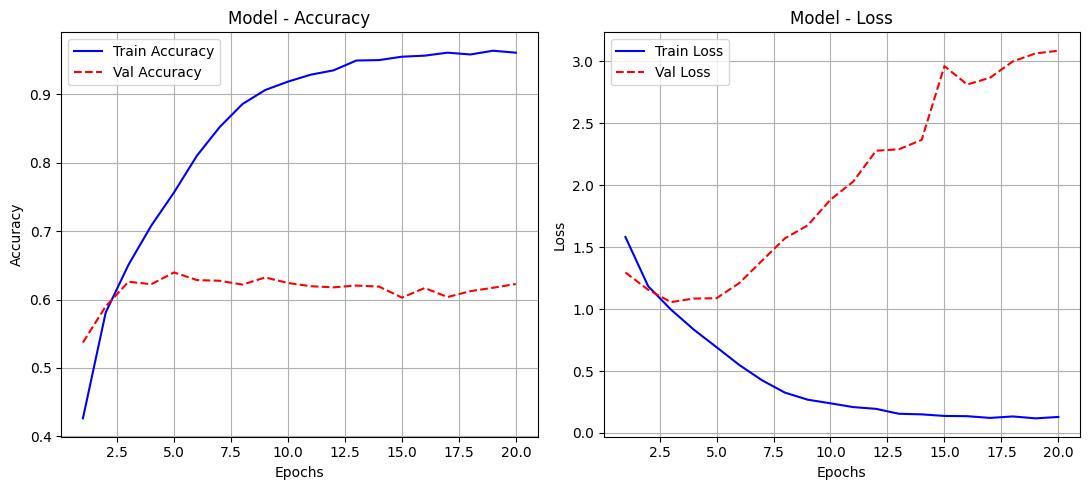

In [23]:
plot_learning_curves(history_sgd)

* *Validation Accuracy struggles beyond ~0.6 ,it flattens after epoch 5.*

* *Validation Loss, though, bottoms out around epoch 5 and then escalates steeply past 2.5 ,indicating overfitting.*

---

**Learning Rate Scheduler + EarlyStopping + Checkpoint**
--

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

model_callbacks = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_callbacks.compile(optimizer=Adam(0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_callbacks = model_callbacks.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val),callbacks=[early_stop, checkpoint, reduce_lr])

Epoch 1/20
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4134 - loss: 1.6262

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.4136 - loss: 1.6258 - val_accuracy: 0.5896 - val_loss: 1.1523 - learning_rate: 0.0010
Epoch 2/20
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6163 - loss: 1.0918

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.6163 - loss: 1.0917 - val_accuracy: 0.6350 - val_loss: 1.0233 - learning_rate: 0.0010
Epoch 3/20
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6821 - loss: 0.9062

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.6821 - loss: 0.9062 - val_accuracy: 0.6662 - val_loss: 0.9475 - learning_rate: 0.0010
Epoch 4/20
1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7307 - loss: 0.7819

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.7307 - loss: 0.7819 - val_accuracy: 0.6790 - val_loss: 0.9248 - learning_rate: 0.0010
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7654 - loss: 0.6752 - val_accuracy: 0.6808 - val_loss: 0.9425 - learning_rate: 0.0010
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7953 - loss: 0.5837 - val_accuracy: 0.6854 - val_loss: 0.9560 - learning_rate: 0.0010
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8253 - loss: 0.5050 - val_accuracy: 0.6844 - val_loss: 1.0064 - learning_rate: 0.0010
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.8848 - loss: 0.3483 - val_accuracy: 0.6872 - val_loss: 1.0843 - learning_rate: 5.0000e-04
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9049 - loss: 0.2810 - val_accuracy: 0.6942 - val_loss: 1.1170 - learning_rate: 5.0000e-04


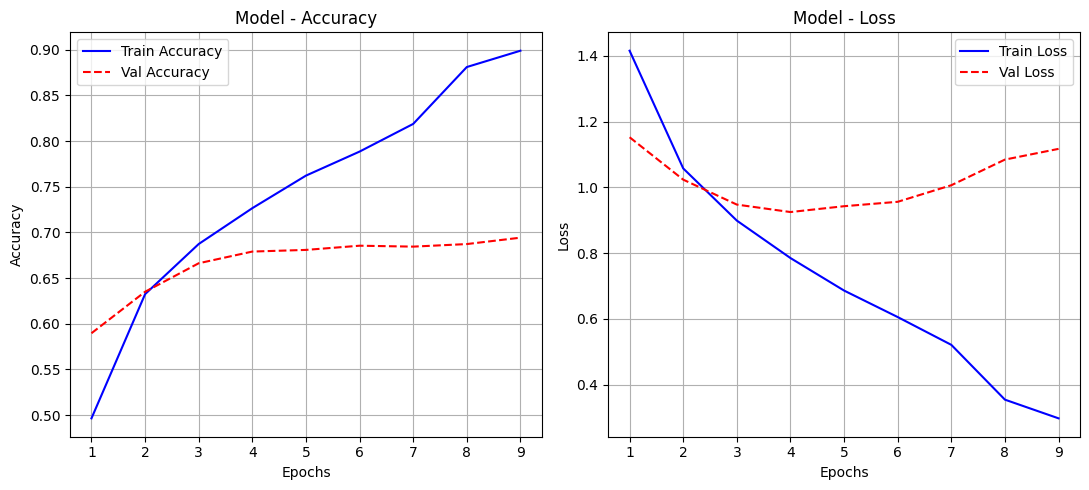

In [25]:
plot_learning_curves(history_callbacks)

* *Validation Accuracy increases initially (~0.60 - ~0.70), then flattens.*

* *Validation Loss drops till epoch 3 (1.2-1.0), then ticks upward (~1.1 at epoch 9).*

---


**Combined Modifications**
---

---
Tuned  model using all the following optimization and improvement techniques collectively:

* Additional layers (depth/width)
* Batch Normalization
*  Dropout
* Optimizer tuning (Adam, SGD with momentum)
* Learning rate scheduler (e.g. ReduceLROnPlateau)

---

In [26]:
from tensorflow.keras.models import Sequential

model_modified = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

model_modified.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history_modified = model_modified.fit(X_train, y_train, epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 174s 121ms/step - accuracy: 0.3886 - loss: 2.0040 - val_accuracy: 0.5822 - val_loss: 1.2036
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 207s 125ms/step - accuracy: 0.6192 - loss: 1.0859 - val_accuracy: 0.6322 - val_loss: 1.0448
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 198s 122ms/step - accuracy: 0.6689 - loss: 0.9345 - val_accuracy: 0.6104 - val_loss: 1.1393
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 205s 124ms/step - accuracy: 0.7086 - loss: 0.8306 - val_accuracy: 0.6952 - val_loss: 0.8750
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 201s 124ms/step - accuracy: 0.7288 - loss: 0.7629 - val_accuracy: 0.7080 - val_loss: 0.8526
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 202s 124ms/step - accuracy: 0.7396 - loss: 0.7406 - val_accuracy: 0.7330 - val_loss: 0.7711
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 208s 128ms/step - accuracy: 0.7679 - loss: 0.6695 - val_accuracy: 0.7460 - val_loss: 0.7483
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 208s 132ms/step - ac

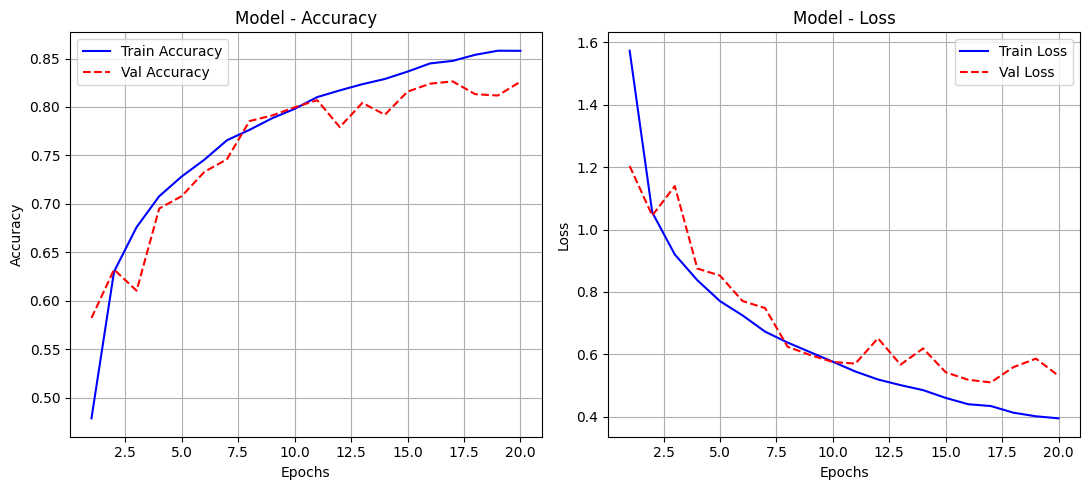

In [28]:
plot_learning_curves(history_modified)

* *Validation Accuracy starts around 0.55 and holds between 0.70 and 0.80, ending near 0.80.*

* *Validation Loss improves from ~1.4 to ~0.6, with minor fluctuations but no sharp rise.*

---

##Final Evaluation
---

In [29]:
model_dict={'Baseline Model':baseline_model,
        'Batch Normalization':model_bn,
        'Dropout':model_dropout,
        'Increased Depth':model_deep,
        'SGD with Momentum':model_sgd,
        'Callbacks':model_callbacks,
        'Combined Modification':model_modified}

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in model_dict.items():
    print(f" Evaluating: {name}")

    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Precision'].append(prec)
    results['Recall'].append(rec)
    results['F1 Score'].append(f1)


results_df = pd.DataFrame(results)


results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)


print("\n Model Performance Summary:")
results_df

 Evaluating: Baseline Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
 Evaluating: Batch Normalization
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
 Evaluating: Dropout
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
 Evaluating: Increased Depth
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
 Evaluating: SGD with Momentum
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
 Evaluating: Callbacks
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
 Evaluating: Combined Modification
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step

 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Combined Modification,0.8204,0.819926,0.8204,0.818803
1,Increased Depth,0.6983,0.699882,0.6983,0.697644
2,Callbacks,0.6767,0.705670,0.6767,0.678473
3,Dropout,0.6667,0.687089,0.6667,0.671274
4,Baseline Model,0.6502,0.650909,0.6502,0.649455
5,Batch Normalization,0.6341,0.634009,0.6341,0.627810
6,SGD with Momentum,0.6143,0.620633,0.6143,0.614373


##Confusion Matrix

---

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


def plot_confusion(cm, model_name):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel2', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Confusion Matrix for: Baseline Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


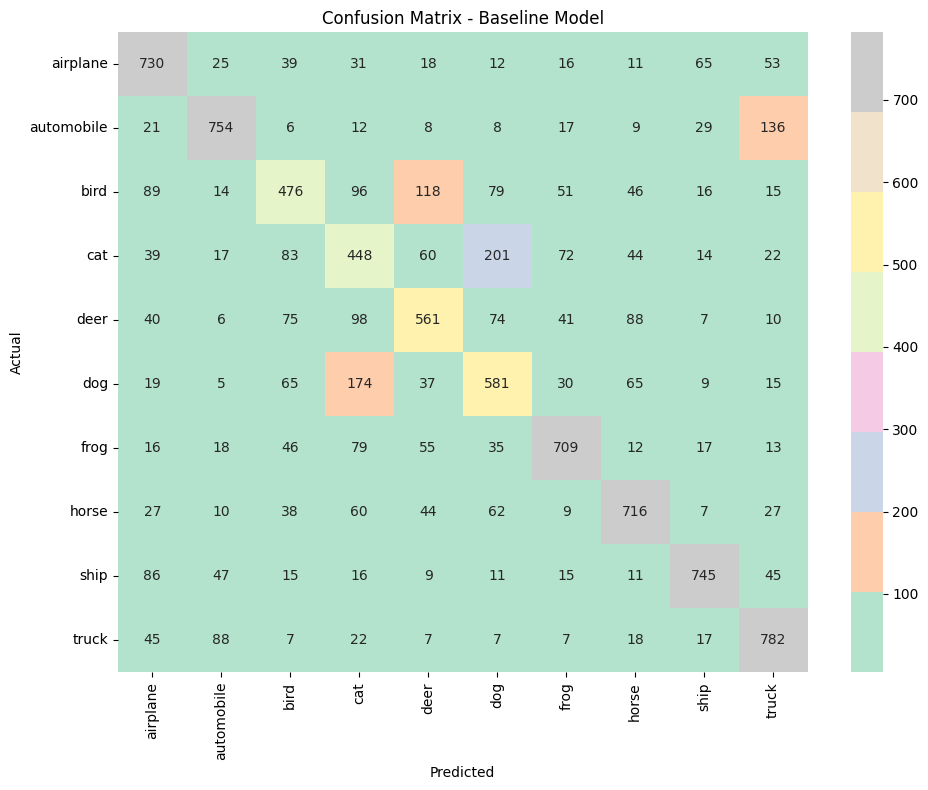

Confusion Matrix for: Batch Normalization
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


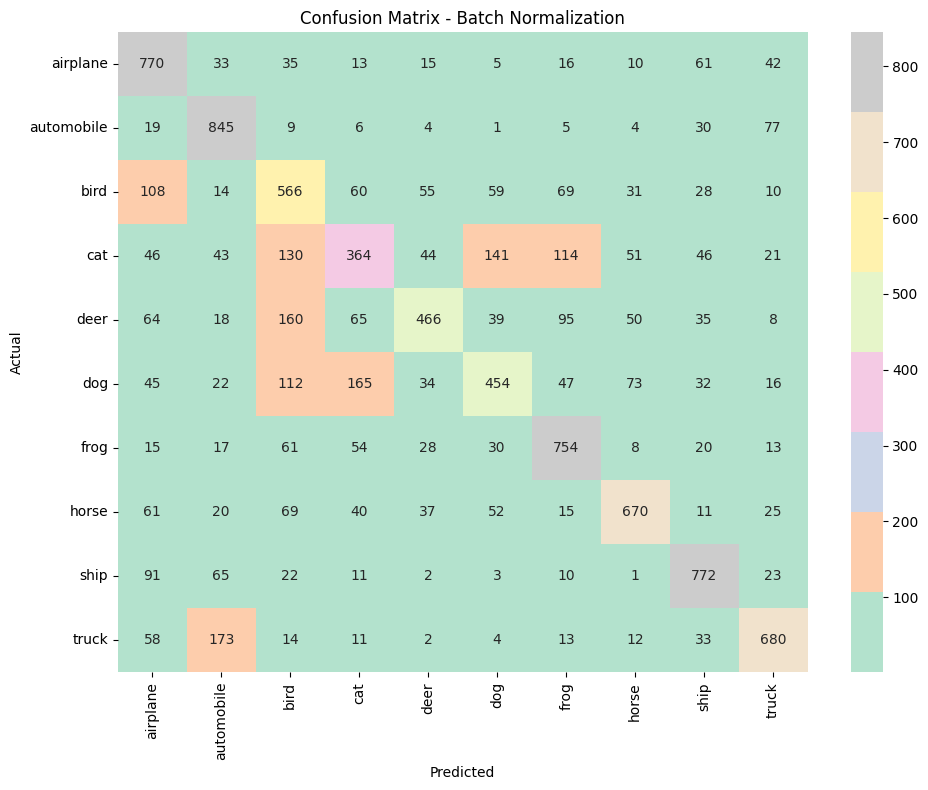

Confusion Matrix for: Dropout
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


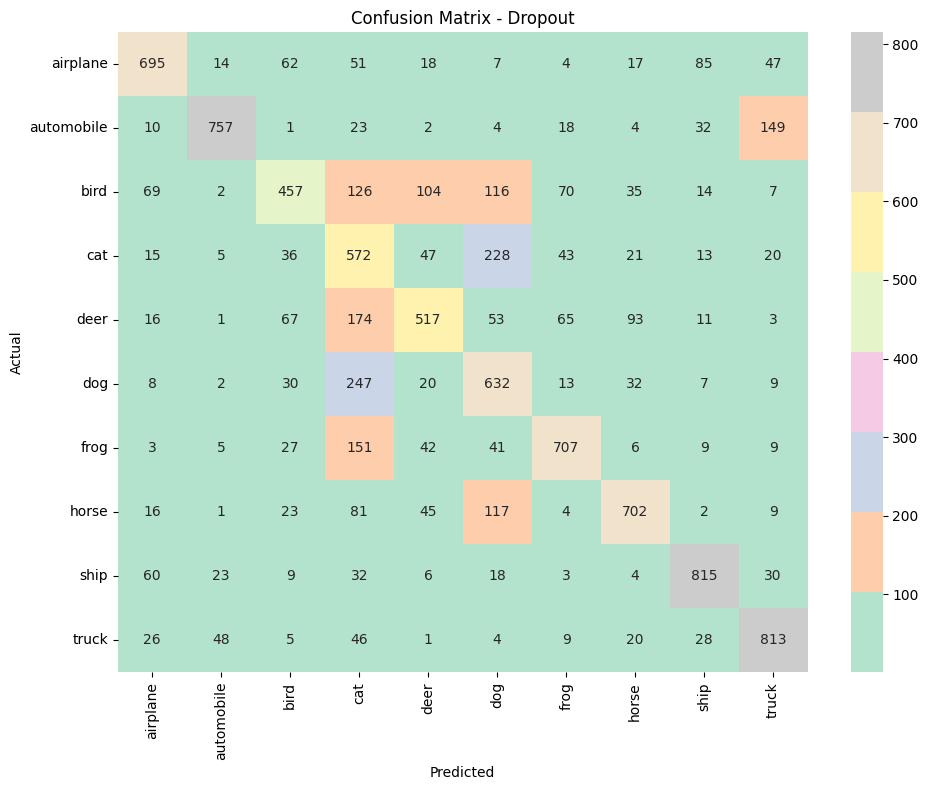

Confusion Matrix for: Increased Depth
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


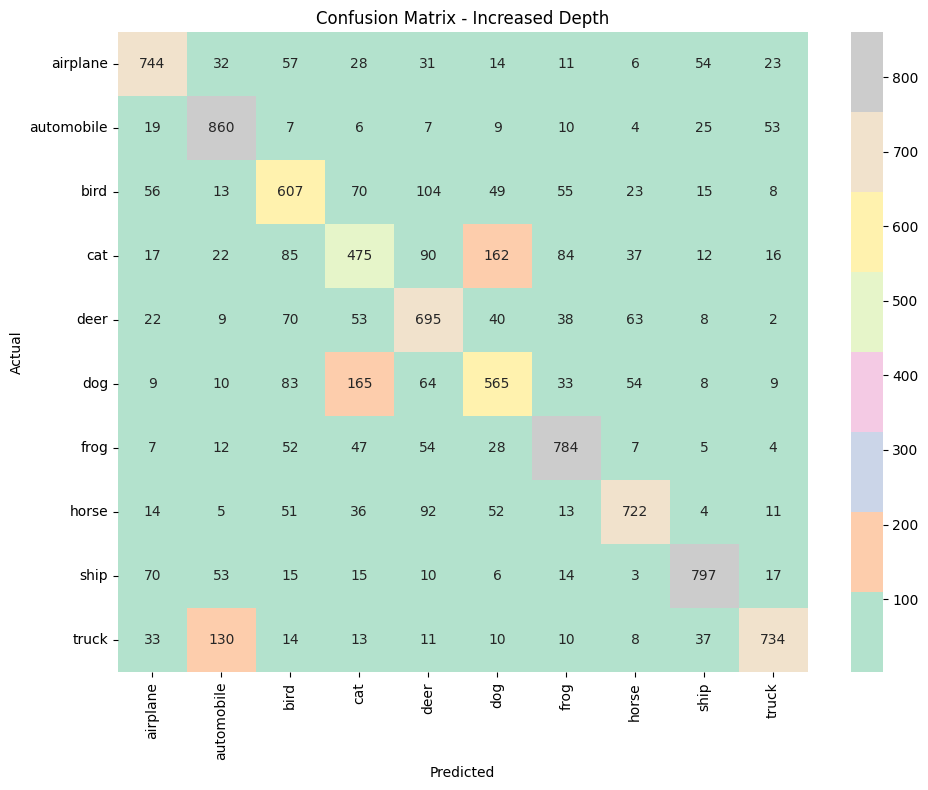

Confusion Matrix for: SGD with Momentum
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


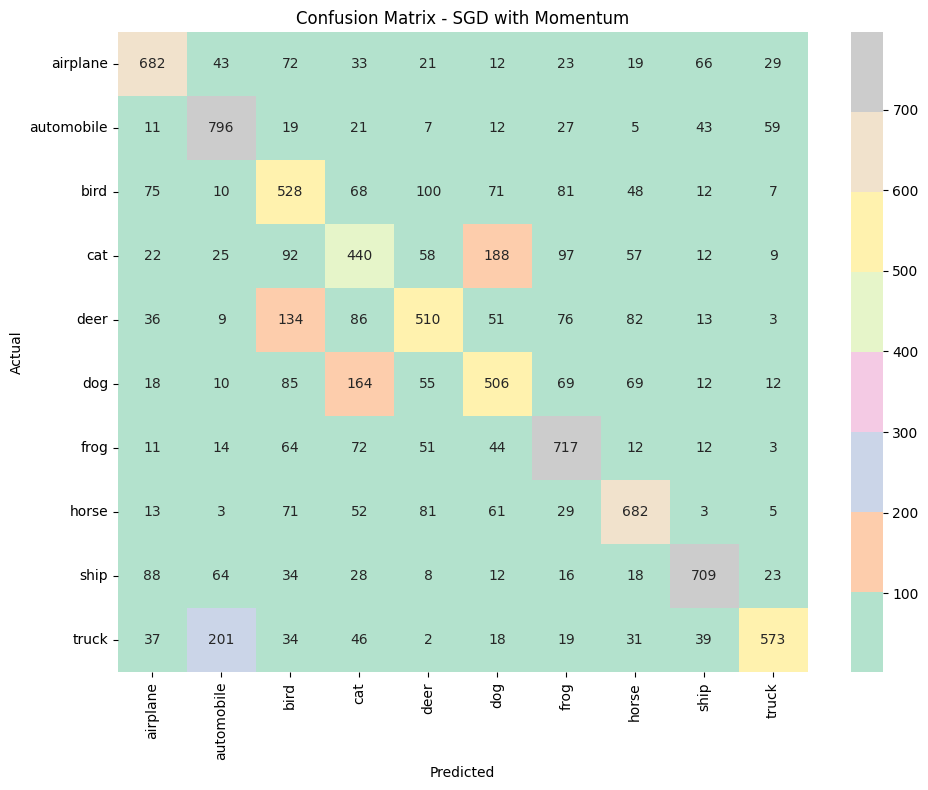

Confusion Matrix for: Callbacks
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


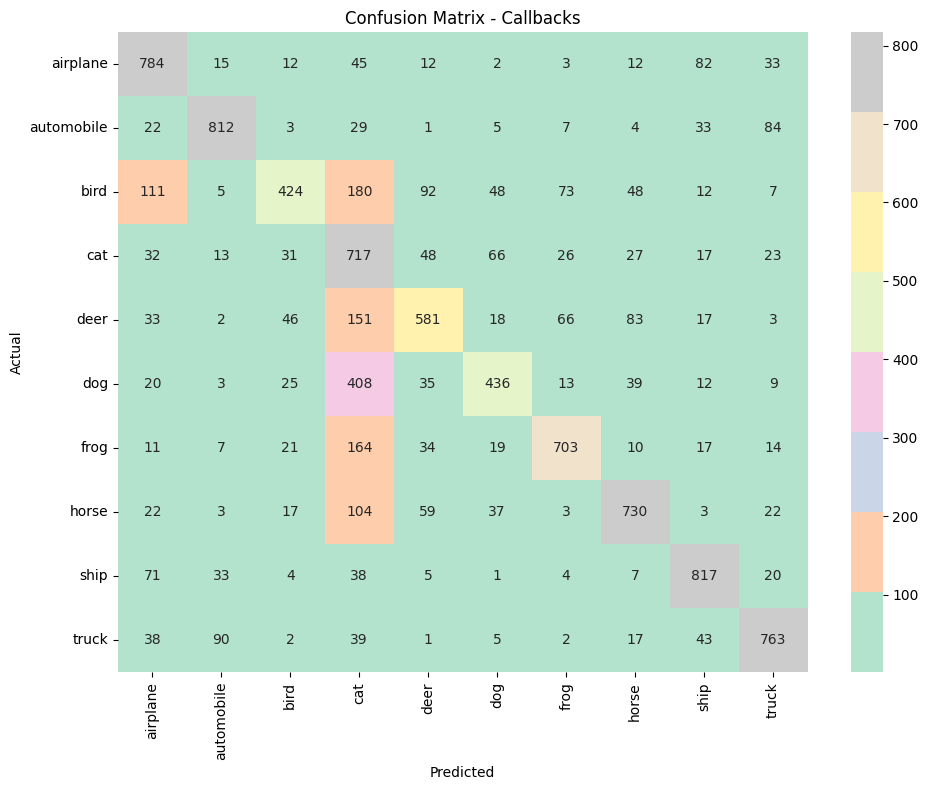

Confusion Matrix for: Combined Modification
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


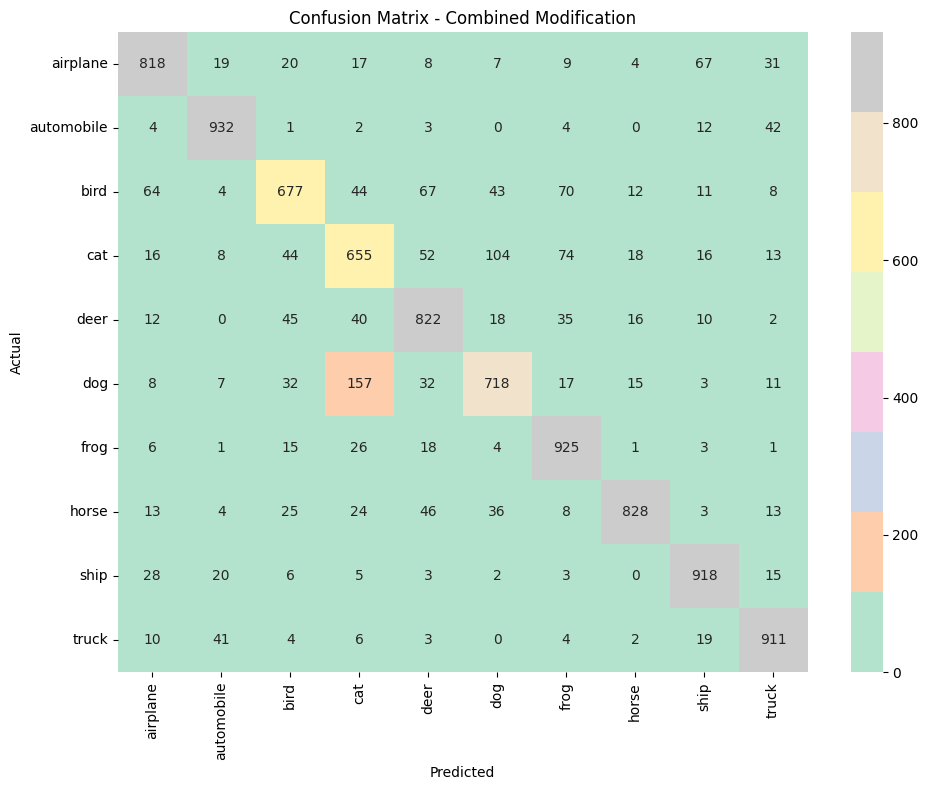

In [36]:
for name, model in model_dict.items():
    print(f"Confusion Matrix for: {name}")
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(y_test, y_pred)

    plot_confusion(cm, name)

#Report

---
**Reasoning Behind Tuning and Design Decisions**

The original baseline model provided a strong starting point but suffered from overfitting, as indicated by high training accuracy and significantly lower test accuracy.To address this several carefully chosen improvements were made to the architecture and training process.

1. Adding Dropout
---
Dropout was introduced after the dense layer to prevent the model from becoming too reliant on specific neurons during training by randomly disabling a portion of the network during each iteration. This helps in reducing overfitting and improves performance on the unseen test data.

2. Using Batch Normalization
---
Batch normalization was inserted after convolutional layers to stabilize and accelerate training. It normalizes activations in intermediate layers, reducing internal covariate shift.

3. Applying Data Augmentation
---
Image augmentation techniques like rotation, shifting, and horizontal flipping were applied to artificially expand the training dataset.

4. Optimizer and Learning Rate Tuning
---
Although the Adam optimizer works well , the learning rate was monitored and dynamically reduced using a scheduler (ReduceLROnPlateau) when the validation loss plateaued. This prevented the model from overshooting minima.

5. Early Stopping and Checkpoints

---
To prevent over-training , early stopping was used to halt training when the validation accuracy stopped improving. This also helped ensure that the best-performing model was retained using model checkpoints.






**What architectural/ training changes led to improvements?**

---


* **Batch Normalization** and **Dropout** helped to regularize the model and prevent overfitting.

* **Increased Depth** (more convolutional layers) allowed the model to learn more complex features.

* **Optimizer Tuning** (Adam with learning rate scheduling), **Early Stopping**, and **Model Checkpoints** improved the training process by adjusting the learning rate dynamically, stopping training when validation loss plateaus, and saving the best performing model.

* The combination of these techniques, as shown in the **"Combined Modifications"** model, resulted in the best performance as seen in the Model Performance Summary table.